# Theory
The period $T$ in function of the initial angle $\theta_0$ of a frictionless pendolum is provided by the following integral:

$$ T (\theta _0) = 4 \sqrt{\frac{L}{g}} \int_0 ^{\pi /2} \frac{d x}{\sqrt{1 - \left[\sin(x) \sin(\frac{\theta_0}{2}) \right]^2}} $$

The integral doesn't know any analytical expression. We are going to expand in Taylor series the integrand function for computing the period.

In [150]:
# Importing SymPy
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [151]:
# Creating symbols
x, L, g, theta_0 = smp.symbols('x L g theta_0')

In [152]:
# Taylor series function (user-defined)
def taylor_series(function, variable, point, order):
    
    sum = 0

    for k in range (order + 1):
        sum += ((smp.diff(function, variable, k).subs(variable, point)) * ((variable - point) ** k)) / smp.factorial(k) 
        
    return sum

In [153]:
# Defining the integrand function
T_integrand = 1 / smp.sqrt(1 - (smp.sin(theta_0 / 2) * smp.sin(x)) ** 2)
T_integrand

1/sqrt(-sin(theta_0/2)**2*sin(x)**2 + 1)

In [154]:
# Approximating the integrand functions with Taylor series
T_integrand = taylor_series(function= T_integrand, variable= x, point= 0, order= 8)
T_integrand.cancel()

35*x**8*sin(theta_0/2)**8/128 - 5*x**8*sin(theta_0/2)**6/16 + 3*x**8*sin(theta_0/2)**4/40 - x**8*sin(theta_0/2)**2/630 + 5*x**6*sin(theta_0/2)**6/16 - x**6*sin(theta_0/2)**4/4 + x**6*sin(theta_0/2)**2/45 + 3*x**4*sin(theta_0/2)**4/8 - x**4*sin(theta_0/2)**2/6 + x**2*sin(theta_0/2)**2/2 + 1

In [155]:
# Calculating the period T in function of theta_0
T = 4 * smp.sqrt(L / g) * (smp.Integral(T_integrand, (x, 0, smp.pi / 2))).doit()
T = smp.collect(T.cancel() / 2, smp.pi * smp.sqrt(L / g)) * 2
T

2*pi*sqrt(L/g)*(35*pi**8*sin(theta_0/2)**8/294912 - 5*pi**8*sin(theta_0/2)**6/36864 + 5*pi**6*sin(theta_0/2)**6/7168 - pi**6*sin(theta_0/2)**4/1792 + pi**8*sin(theta_0/2)**4/30720 + 3*pi**4*sin(theta_0/2)**4/640 - pi**4*sin(theta_0/2)**2/480 - pi**8*sin(theta_0/2)**2/1451520 + pi**6*sin(theta_0/2)**2/20160 + pi**2*sin(theta_0/2)**2/24 + 1)

We can easily see that $T \rightarrow 2 \pi \sqrt{\frac{L}{g}}$ for $ \theta _0 \rightarrow 0 $ 

In [156]:
# T as a function that accepts NumPy arrays
T = smp.lambdify((L, g, theta_0), T, 'numpy')

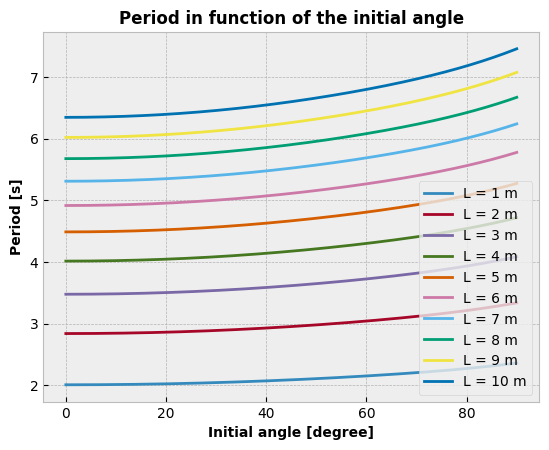

In [157]:
# Plotting the graph T(theta_0) for different pendolum lengths
theta_0 = np.linspace(0, np.pi / 2, 10000)

for j in range(0, 10, 1):
    plt.plot(theta_0 * 57.2958, T(L= 1 + j, g= 9.81, theta_0= theta_0), label=f"L = {1 + j} m")

plt.title("Period in function of the initial angle", fontweight= "bold", fontsize= 12)
plt.xlabel("Initial angle [degree]", fontweight= "bold", fontsize= 10)
plt.ylabel("Period [s]", fontweight= "bold", fontsize= 10)
plt.legend()